<p align="center"><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="260" height="110" /></p>

---
# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
2. [**Problem Statement**](#Section2)<br>
3. [**Installing & Importing Libraries**](#Section3)<br>
4. [**Data Acquisition & Description**](#Section4)<br>
5. [**Data Pre-Profiling**](#Section5)<br>
6. [**Data Pre-Processing**](#Section6)<br>
7. [**Data Post-Profiling**](#Section7)<br>
8. [**Exploratory Data Analysis**](#Section8)<br>
9. [**Algorithm Testing**](#Section8)<br>
10. [**Summarization**](#Section9)</br>
   10.1 [**Conclusion**](#Section91)</br>


---

---
<a name = Section1></a>
# **1. Introduction**
---

- There is alot of uncertainity in the Weather due to Climate change and other factors.
- We will be using the data of the Weather from the first half of the 1940s in our model to predict the Weather.

---
<a name = Section2></a>
# **2. Problem Statement**
---

- Our goal is to predict Good or Bad Weather, Good weather being not having any of the below conditions 
  - Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog; 

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

In [2]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                              # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
sns.set()

from subprocess import check_output

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
- The dataset consists of the information about the weather from 1940 to 1945. Various variables present in the dataset includes Snowfall, Precipitation, Wind Speed etc. 
- The dataset comprises of __119040 observations of 31 columns__. Below is a table showing names of all the columns and their description.

|Id|Feature|Description|
|:--|:--|:--|
|01|STA| Weather Station.| 
|02|Date|Self explinatory.| 
|03|Precip|Precipitation in mm.| 
|04|WindGustSpd | Peak wind speed in km/hr. |
|05| MaxTempMaximum| Temperature in degree Celsius.|
|06| MinTempMinimum | Temperature in degree Celsius.|
|07| MeanTempMean | Temperature in degree Celsius.|
|08| Snowfall | Snowfall and Ice Pellets in mm.|
|09| PoorWeather| Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog; 0 = No, 1 = Yes.|
|10| YR| Year of Observation.|
|11| MO| Month of Observation.|
|12| DA| Day of Observation.|
|13| PRCP | Precipitation in Inches and Hundredths.|
|14| DR | Peak wind gust direction in tens of degrees.|
|15| SPD| Peak wind gust speed in knots.|
|16| MAX |Maximum temperature in degrees Fahrenheit.|
|17| MIN |Minimum temperature in degrees Fahrenheit.|
|18|MEA|Mean temperature in degrees Fahrenheit.|
|19|SNF|Snowfall in inches and tenths.|
|20|SND| Snow depth (includes ice pellets) recorded at 1200 GMT except 0000 GMT in Far East Asian Area in - inches and tenths.|
|21|FTF|Frozen Ground Top (depth in inches).|
|22|FB| Frozen Ground Base (depth in inches).|
|23|FTI| Frozen Ground Thickness (thickness in inches).|
|24|ITH|Ice Thickness on Water (inches and tenths).|
|25|PGT|Peak wind gust time (hours and tenths).|
|26|TSHDSBRSGF|Day with: Thunder; Sleet; Hail; Dust or Sand; Smoke or Haze; Blowing Snow; Rain; Snow; Glaze; Fog; 0 = No, 1 = Yes.|
|27|SD3|Peak wind gust time (hours and tenths).|
|28|RHX24|hour maximum relative humidity, as a whole percent.|
|29|RHN24|hour minimum relative humidity, as a whole percent|
|30|RVG|River guage in feet and tenths|
|31|WTE|Water equivalent of snow and ice on ground in inches and hundredths|
 

In [3]:
weather = pd.read_csv ("https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/Summary%20of%20Weather.csv")
weather.dtypes

C:\Users\91981\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (7,8,18,25) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


STA              int64
Date            object
Precip          object
WindGustSpd    float64
MaxTemp        float64
MinTemp        float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
YR               int64
MO               int64
DA               int64
PRCP            object
DR             float64
SPD            float64
MAX            float64
MIN            float64
MEA            float64
SNF             object
SND            float64
FT             float64
FB             float64
FTI            float64
ITH            float64
PGT            float64
TSHDSBRSGF      object
SD3            float64
RHX            float64
RHN            float64
RVG            float64
WTE            float64
dtype: object

---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- We observe that there are many missing values in the dataset.

- There are too many columns that are a repetition of the same data, for example Temperature in Celsius and Fahrenheit.

In [4]:
weather.head(100)

,STA,Date,Precip,WindGustSpd,MaxTemp,MinTemp,MeanTemp,Snowfall,PoorWeather,YR,...,FB,FTI,ITH,PGT,TSHDSBRSGF,SD3,RHX,RHN,RVG,WTE
0,10001,1942-7-1,1.016,NaN,25.555556,22.222222,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10001,1942-7-2,0,NaN,28.888889,21.666667,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10001,1942-7-3,2.54,NaN,26.111111,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10001,1942-7-4,2.54,NaN,26.666667,22.222222,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10001,1942-7-5,0,NaN,26.666667,21.666667,24.444444,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,10001,1942-10-4,5.588,NaN,27.222222,21.111111,23.888889,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,10001,1942-10-5,0,NaN,31.111111,22.222222,26.666667,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,10001,1942-10-6,0.254,NaN,29.444444,22.222222,25.555556,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,10001,1942-10-7,5.08,NaN,29.444444,22.777778,26.111111,0,NaN,42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ploting a KDE of Mean Temperature we see that the patern is a normal distribution

Text(0.5, 1.0, 'KDE plot showing the density of Temperature')

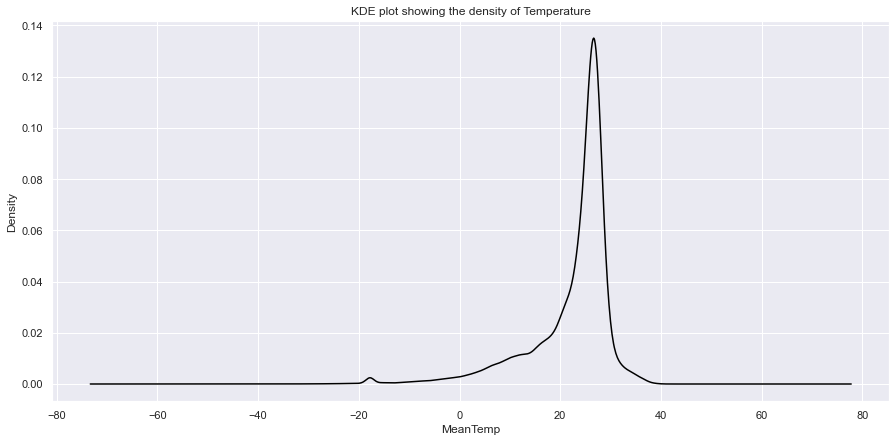

In [7]:
weather['MeanTemp'].plot(kind='kde', figsize=(15, 7), color='black')

plt.xlabel('MeanTemp')
plt.ylabel('Density')
plt.title('KDE plot showing the density of Temperature')

In [8]:
weather.isnull().sum()

STA                 0
Date                0
Precip              0
WindGustSpd    118508
MaxTemp             0
MinTemp             0
MeanTemp            0
Snowfall         1163
PoorWeather     84803
YR                  0
MO                  0
DA                  0
PRCP             1932
DR             118507
SPD            118508
MAX               474
MIN               468
MEA               498
SNF              1163
SND            113477
FT             119040
FB             119040
FTI            119040
ITH            119040
PGT            118515
TSHDSBRSGF      84803
SD3            119040
RHX            119040
RHN            119040
RVG            119040
WTE            119040
dtype: int64

We can also understand that the Columns for Frozen Ground and Ice Thiness on Water have values as zero

In [9]:
weather.count()

STA            119040
Date           119040
Precip         119040
WindGustSpd       532
MaxTemp        119040
MinTemp        119040
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
YR             119040
MO             119040
DA             119040
PRCP           117108
DR                533
SPD               532
MAX            118566
MIN            118572
MEA            118542
SNF            117877
SND              5563
FT                  0
FB                  0
FTI                 0
ITH                 0
PGT               525
TSHDSBRSGF      34237
SD3                 0
RHX                 0
RHN                 0
RVG                 0
WTE                 0
dtype: int64

---
<a name = Section6></a>
# **6. Data Pre-Processing**
---
  - For predicting the weather we do not require the Date, Weather station, year/month/day details 

  - Since the Temperature is repeated we will remove all values in Fahrenheit and Max and Min in Celcius, we will only keep the 
    Mean Temperature in Celcius,

  - Many Columns where there are no values or values are "0" we can remove from our analysis,

  - Only the dependant variable "PoorWeather" and Precip, WindGustSpd, Mean Temp, Snowfall will be retained,

  - All other Columns are a repetition of these.

In [11]:
weather_data = weather.drop(['STA','FT','FB','FTI','ITH','SD3','RHX','RHN','RVG','WTE','MaxTemp','MinTemp','MAX','MIN','MEA','TSHDSBRSGF','SND','Date','DA','PRCP','DR','SPD','SNF','PGT','YR','MO'], axis = 1)
weather_data.head()

,Precip,WindGustSpd,MeanTemp,Snowfall,PoorWeather
0,1.016,NaN,23.888889,0,NaN
1,0,NaN,25.555556,0,NaN
2,2.54,NaN,24.444444,0,NaN
3,2.54,NaN,24.444444,0,NaN
4,0,NaN,24.444444,0,NaN


Here we see that there are missing values in Wind Gust Speed, Snowfall and PoorWeather

In [12]:
weather_data.count()

Precip         119040
WindGustSpd       532
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
dtype: int64

In [13]:
weather_data.isnull().sum()

Precip              0
WindGustSpd    118508
MeanTemp            0
Snowfall         1163
PoorWeather     84803
dtype: int64

In [14]:
weather_data.describe(include = 'all')

,Precip,WindGustSpd,MeanTemp,Snowfall,PoorWeather
count,119040,532.000000,119040.000000,117877.0,34237
unique,540,NaN,NaN,42.0,39
top,0,NaN,NaN,0.0,1
freq,64267,NaN,NaN,86090.0,25846
mean,NaN,37.774534,22.411631,NaN,NaN
std,NaN,10.297808,8.297982,NaN,NaN
min,NaN,18.520000,-35.555556,NaN,NaN
25%,NaN,29.632000,20.555556,NaN,NaN
50%,NaN,37.040000,25.555556,NaN,NaN
75%,NaN,43.059000,27.222222,NaN,NaN


On observation we notice that Precip and Snowfall are updated as Object we require to convert these to Integers

In [15]:
weather_data.dtypes

Precip          object
WindGustSpd    float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
dtype: object

In [16]:
weather_data.head(100)

,Precip,WindGustSpd,MeanTemp,Snowfall,PoorWeather
0,1.016,NaN,23.888889,0,NaN
1,0,NaN,25.555556,0,NaN
2,2.54,NaN,24.444444,0,NaN
3,2.54,NaN,24.444444,0,NaN
4,0,NaN,24.444444,0,NaN
...,...,...,...,...,...
95,5.588,NaN,23.888889,0,NaN
96,0,NaN,26.666667,0,NaN
97,0.254,NaN,25.555556,0,NaN
98,5.08,NaN,26.111111,0,NaN


Checking for any discrepancies in the data for Snowfall, we find incorrect value of "#VALUE!" which we convert to "0"
Similarly in Precip there is a value of "T" which also we will convert to "0"

In [18]:
weather_data['Snowfall'].value_counts()

0.0        86090
0          29600
5.08         527
7.62         319
2.54         317
10.16        195
12.7          90
20.32         83
17.78         78
15.24         70
22.86         69
25.4          68
#VALUE!       44
27.94         40
30.48         31
45.72         25
50.8          24
2.54          22
48.26         22
35.56         20
33.02         15
60.96         13
7.62          11
38.1          11
66.04         11
43.18         10
10.16         10
53.34         10
63.5           7
5.08           7
40.64          6
55.88          6
76.2           5
58.42          5
15.24          4
81.28          4
78.74          2
12.7           2
83.82          1
86.36          1
68.58          1
73.66          1
Name: Snowfall, dtype: int64

In [19]:
weather_data['PoorWeather'].shape

(119040,)

In [20]:
weather_data.info

<bound method DataFrame.info of        Precip  WindGustSpd   MeanTemp Snowfall PoorWeather
0       1.016          NaN  23.888889        0         NaN
1           0          NaN  25.555556        0         NaN
2        2.54          NaN  24.444444        0         NaN
3        2.54          NaN  24.444444        0         NaN
4           0          NaN  24.444444        0         NaN
...       ...          ...        ...      ...         ...
119035      0          NaN  23.333333        0         NaN
119036  9.906          NaN  23.888889        0           1
119037      0          NaN  23.333333        0           1
119038      0          NaN  23.333333        0         NaN
119039      0          NaN  23.333333        0         NaN

[119040 rows x 5 columns]>

In [21]:
weather_data = weather_data.replace(to_replace="#VALUE!", value=0)

In [22]:
weather_data['Snowfall'].value_counts()

0.0      86134
0        29600
5.08       527
7.62       319
2.54       317
10.16      195
12.7        90
20.32       83
17.78       78
15.24       70
22.86       69
25.4        68
27.94       40
30.48       31
45.72       25
50.8        24
48.26       22
2.54        22
35.56       20
33.02       15
60.96       13
7.62        11
38.1        11
66.04       11
10.16       10
53.34       10
43.18       10
63.5         7
5.08         7
40.64        6
55.88        6
58.42        5
76.2         5
81.28        4
15.24        4
78.74        2
12.7         2
86.36        1
73.66        1
83.82        1
68.58        1
Name: Snowfall, dtype: int64

In [23]:
weather_data = weather_data.replace(to_replace="T", value=0)

In [24]:
weather_data['Precip'].value_counts()

0          64267
0          16753
0.254       3389
0.508       2909
0.762       2015
           ...  
164.846        1
238.76         1
144.78         1
101.6          1
233.172        1
Name: Precip, Length: 540, dtype: int64

Once we have converted corrected the values which were invalid or incorrect, we now change the values in both Snowfall and Precip from Object type to Interger type

In [25]:
weather_data['Precip'] = pd.to_numeric(weather_data['Precip'])

In [26]:
weather_data.dtypes

Precip         float64
WindGustSpd    float64
MeanTemp       float64
Snowfall        object
PoorWeather     object
dtype: object

In [27]:
weather_data['Snowfall'] = pd.to_numeric(weather_data['Snowfall'])

In [28]:
weather_data.dtypes

Precip         float64
WindGustSpd    float64
MeanTemp       float64
Snowfall       float64
PoorWeather     object
dtype: object

In [29]:
weather_data.count()

Precip         119040
WindGustSpd       532
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
dtype: int64

In [30]:
weather_data['WindGustSpd'].value_counts()

37.040    71
29.632    55
27.780    50
33.336    42
40.744    37
31.484    34
44.448    24
35.188    23
42.596    20
38.892    19
50.004    17
24.076    16
46.300    15
22.224    13
48.152    13
25.928    12
53.708    12
51.856    12
57.412     9
59.264     7
55.560     7
20.372     5
61.116     5
62.968     5
74.080     2
18.520     2
75.932     2
64.820     1
66.672     1
68.524     1
Name: WindGustSpd, dtype: int64

In [31]:
weather_data.count()

Precip         119040
WindGustSpd       532
MeanTemp       119040
Snowfall       117877
PoorWeather     34237
dtype: int64

Nowe we see that the Mean, Median Standard Deviation is being calculated for all columns since they are now all Integers, except the dependant variable Poor Weather

In [32]:
weather_data.describe(include = 'all')

,Precip,WindGustSpd,MeanTemp,Snowfall,PoorWeather
count,119040.000000,532.000000,119040.000000,117877.000000,34237
unique,NaN,NaN,NaN,NaN,39
top,NaN,NaN,NaN,NaN,1
freq,NaN,NaN,NaN,NaN,25846
mean,3.225612,37.774534,22.411631,0.245452,NaN
std,10.801044,10.297808,8.297982,2.626114,NaN
min,0.000000,18.520000,-35.555556,0.000000,NaN
25%,0.000000,29.632000,20.555556,0.000000,NaN
50%,0.000000,37.040000,25.555556,0.000000,NaN
75%,0.762000,43.059000,27.222222,0.000000,NaN


For Variable Poor Weather we observe that the special format is used to indicate the respective weather condition, example Fog, Thunder, Sleet etc. Since this is not in a format that is comprehendable we update all these as Poor Weather and whereever the value is "nan" we update as Good Weather

In [33]:
weather_data['PoorWeather'].unique()

array([nan, '1', '1     1', '1 1', '1     1  1', '1  1', '1        1',
       '0', '1   1 1', '1    1', '1     0', '1000', '1001', '100000',
       '1000001000', '101000', '101001', '1000001001', '1000101001',
       '100001', '1000000000', '1000101000', '1010001000', '1000100000',
       '1000100001', '1010001001', '10001001', '11', '11 1', '11    1',
       '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1', '1000000',
       '1101000', '1101001', '1   1', 1.0], dtype=object)

In [34]:
weather_data['WindGustSpd'].unique()

array([   nan, 29.632, 59.264, 50.004, 40.744, 51.856, 44.448, 57.412,
       53.708, 42.596, 62.968, 68.524, 61.116, 46.3  , 38.892, 55.56 ,
       31.484, 37.04 , 74.08 , 64.82 , 48.152, 35.188, 27.78 , 33.336,
       20.372, 22.224, 24.076, 25.928, 75.932, 66.672, 18.52 ])

In [35]:
poorweather = weather_data['PoorWeather'].unique()
print (poorweather)

[nan '1' '1     1' '1 1' '1     1  1' '1  1' '1        1' '0' '1   1 1'
 '1    1' '1     0' '1000' '1001' '100000' '1000001000' '101000' '101001'
 '1000001001' '1000101001' '100001' '1000000000' '1000101000' '1010001000'
 '1000100000' '1000100001' '1010001001' '10001001' '11' '11 1' '11    1'
 '1100000' '1 1  1' '1 0  1' '1 0' '1   1 1  1' '1000000' '1101000'
 '1101001' '1   1' 1.0]


In [36]:
weather_data['WindGustSpd'].unique()

array([   nan, 29.632, 59.264, 50.004, 40.744, 51.856, 44.448, 57.412,
       53.708, 42.596, 62.968, 68.524, 61.116, 46.3  , 38.892, 55.56 ,
       31.484, 37.04 , 74.08 , 64.82 , 48.152, 35.188, 27.78 , 33.336,
       20.372, 22.224, 24.076, 25.928, 75.932, 66.672, 18.52 ])

In [37]:
poorweather = weather_data['PoorWeather'].unique()
print (poorweather)

[nan '1' '1     1' '1 1' '1     1  1' '1  1' '1        1' '0' '1   1 1'
 '1    1' '1     0' '1000' '1001' '100000' '1000001000' '101000' '101001'
 '1000001001' '1000101001' '100001' '1000000000' '1000101000' '1010001000'
 '1000100000' '1000100001' '1010001001' '10001001' '11' '11 1' '11    1'
 '1100000' '1 1  1' '1 0  1' '1 0' '1   1 1  1' '1000000' '1101000'
 '1101001' '1   1' 1.0]


In [38]:
weather_data.dtypes

Precip         float64
WindGustSpd    float64
MeanTemp       float64
Snowfall       float64
PoorWeather     object
dtype: object

In [39]:
weather_data['PoorWeather'] = weather_data['PoorWeather'].fillna ("Goodweather")

In [40]:
weather_data['PoorWeather'].unique()

array(['Goodweather', '1', '1     1', '1 1', '1     1  1', '1  1',
       '1        1', '0', '1   1 1', '1    1', '1     0', '1000', '1001',
       '100000', '1000001000', '101000', '101001', '1000001001',
       '1000101001', '100001', '1000000000', '1000101000', '1010001000',
       '1000100000', '1000100001', '1010001001', '10001001', '11', '11 1',
       '11    1', '1100000', '1 1  1', '1 0  1', '1 0', '1   1 1  1',
       '1000000', '1101000', '1101001', '1   1', 1.0], dtype=object)

In [41]:
weather_data['WindGustSpd'] = weather_data['WindGustSpd'].fillna (0)

In [42]:
weather_data['Snowfall'] = weather_data['Snowfall'].fillna (0)

In [43]:
weather_data.count()

Precip         119040
WindGustSpd    119040
MeanTemp       119040
Snowfall       119040
PoorWeather    119040
dtype: int64

In [44]:
weather_database = weather_data.rename({'PoorWeather' : 'Weather'}, axis=1, inplace=False)

In [45]:
weather_database.count()

Precip         119040
WindGustSpd    119040
MeanTemp       119040
Snowfall       119040
Weather        119040
dtype: int64

We rename the Column of PoorWeather to Weather

In [48]:
weather_database1 = weather_data.rename({'PoorWeather' : 'Weather'}, axis=1, inplace=False)

In [49]:
weather_database1.count()

Precip         119040
WindGustSpd    119040
MeanTemp       119040
Snowfall       119040
Weather        119040
dtype: int64

In [51]:
weather_database1['Weather'].value_counts()

Goodweather    84803
1              25846
1.0             6134
0                870
1     1          310
100000           263
1 1              133
1 1  1            96
1000              91
100001            62
101000            56
1    1            56
1000001000        52
1  1              49
1000001001        45
11                39
1100000           16
1001              16
101001            14
1   1 1           14
1000101001        13
1000101000         9
11 1               8
1000000            7
1000000000         6
1010001000         5
1     1  1         5
11    1            5
1101000            2
1 0  1             2
1000100001         2
1   1 1  1         2
1010001001         2
1000100000         1
1        1         1
1   1              1
1 0                1
1101001            1
10001001           1
1     0            1
Name: Weather, dtype: int64

In [52]:
for (row, col) in weather_database1.iterrows():

    if col.Weather != "Goodweather" :
        weather_database1['Weather'].replace(to_replace=col.Weather, value='Poorweather', inplace=True)


In [53]:
weather_database1['Weather'].value_counts()

Goodweather    84803
Poorweather    34237
Name: Weather, dtype: int64

After adding completed the Pre-Processing we now have the same count in all the variables

In [54]:
weather_database1.count()

Precip         119040
WindGustSpd    119040
MeanTemp       119040
Snowfall       119040
Weather        119040
dtype: int64

In [55]:
weather_database1.dtypes

Precip         float64
WindGustSpd    float64
MeanTemp       float64
Snowfall       float64
Weather         object
dtype: object

---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---
By Plotting a PairPlot we are checking for correlation between variables and whether they are normally distributed

In [ ]:
Observations are that Mean Temperature is skewed to the higher side, arount 25 between the mean

C:\Users\91981\anaconda3\lib\site-packages\seaborn\axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\91981\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\91981\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


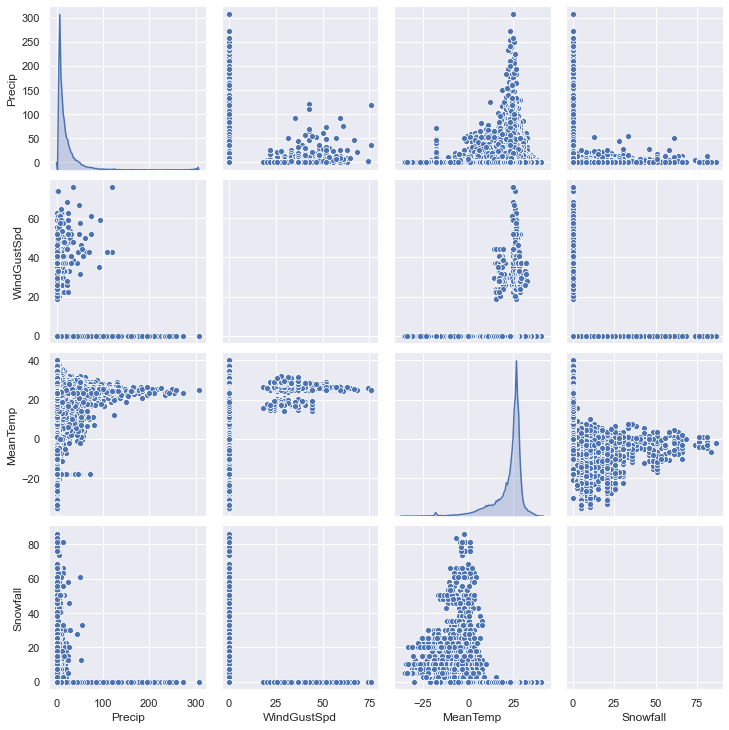

In [57]:
sns.pairplot(data=weather_database1[['Precip', 'WindGustSpd', 'MeanTemp', 'Snowfall']], size=2.5, diag_kind='kde')

On plotting a Heatmap we observe that there is no multicollinearity between the Independant variables except between Mean Temp and Snowfall which are negatively correlated 

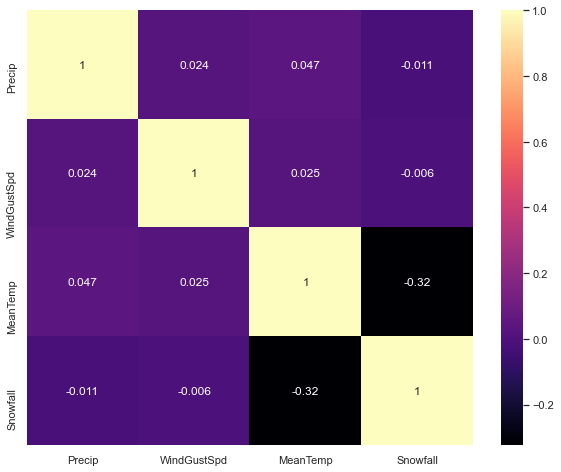

In [59]:
corr_mat = weather_database1.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_mat, annot=True, cmap='magma')

The below Scatter Plot shows the variation in Snowfall and Windspeed on Weather condition
Higher the temperation show Good Weather condition where as higher the snowfall weather is poor

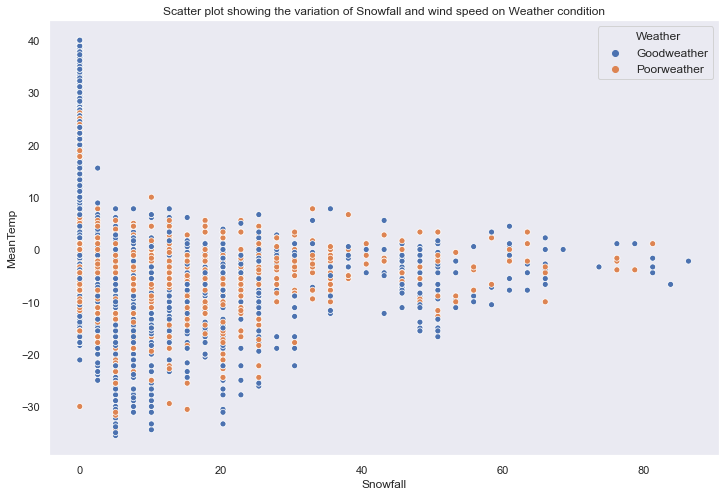

In [61]:
plt.figure(figsize=(12,8))
sns.scatterplot(data=weather_database1, x='Snowfall', y='MeanTemp', hue='Weather')

plt.xlabel('Snowfall')
plt.ylabel('MeanTemp')
plt.title('Scatter plot showing the variation of Snowfall and wind speed on Weather condition')
plt.grid(False)
plt.legend(fontsize=12)

---
<a name = Section8></a>
# **8. Algorithm testing**

- Our dependant variable is a Classification Variable so we will Run the **Logistic Regression** Algorithm to predict the Weather condition

In [109]:
from sklearn.preprocessing import StandardScaler

Dropping the Mean Temp since it is correlating negatively with Snowfall

In [68]:
weather_database2 = weather_database1.drop(['MeanTemp'], axis = 1)
weather_database2.head()

,Precip,WindGustSpd,Snowfall,Weather
0,1.016,0.0,0.0,Goodweather
1,0.000,0.0,0.0,Goodweather
2,2.540,0.0,0.0,Goodweather
3,2.540,0.0,0.0,Goodweather
4,0.000,0.0,0.0,Goodweather


Allocation of X and y variables

In [70]:
X = weather_database2.loc[:,weather_database2.columns != 'Weather', ]
X.head()

,Precip,WindGustSpd,Snowfall
0,1.016,0.0,0.0
1,0.000,0.0,0.0
2,2.540,0.0,0.0
3,2.540,0.0,0.0
4,0.000,0.0,0.0


In [73]:
y = weather_database1.Weather 
y.head()

0    Goodweather
1    Goodweather
2    Goodweather
3    Goodweather
4    Goodweather
Name: Weather, dtype: object

In [74]:
X.shape

(119040, 3)

In [75]:
y.shape

(119040,)

We do a Train Test Split

In [77]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [79]:
print(X_test.shape)
print(y_test.shape)

(23808, 3)
(23808,)


In [78]:
print(X_train.shape)
print(y_train.shape)

(95232, 3)
(95232,)


In [80]:
X_train.head(10)

,Precip,WindGustSpd,Snowfall
101245,0.0,0.0,0.0
86593,0.0,0.0,0.0
115208,0.0,0.0,0.0
42429,0.0,0.0,0.0
59229,0.0,0.0,0.0
76030,0.0,0.0,0.0
117752,0.0,0.0,0.0
71250,0.0,0.0,0.0
70745,0.0,0.0,0.0
39060,0.0,0.0,0.0


In [81]:
X_test.head(10)

,Precip,WindGustSpd,Snowfall
62234,0.000,0.0,0.0
28328,0.000,0.0,0.0
62139,0.000,0.0,0.0
37166,8.890,0.0,0.0
10655,10.160,0.0,0.0
4646,0.000,0.0,0.0
44602,2.794,0.0,0.0
82213,1.778,0.0,0.0
49873,0.000,0.0,0.0
31389,0.000,0.0,0.0


Now, we apply the Logistic Regression Model and see the predicted result 

In [82]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression()

In [83]:
y_pred_train = logreg.predict(X_train) 

In [84]:
y_pred_test = logreg.predict(X_test)   

In [85]:
print(list(y_train))

['Poorweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Poorweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Goodweather', 'Poorweather', 'Goodweather', 'Goodweat

In [86]:
y_pred_train

array(['Goodweather', 'Goodweather', 'Goodweather', ..., 'Goodweather',
       'Goodweather', 'Goodweather'], dtype=object)

Accuracy Score for the Train and Test data is 71.2 and 71.5 percentage points respectively

In [87]:
from sklearn.metrics import accuracy_score
print('Accuracy score for train data is:', accuracy_score(y_train,y_pred_train))
print()
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

Accuracy score for train data is: 0.7126806115591398

Accuracy score for test data is: 0.7156838037634409


In [88]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

print(confusion_matrix)

       0    1
0  16670  347
1   6422  369


In [89]:
confusion_matrix.index = ['Poor Weather','Good Weather']
confusion_matrix.columns = ['Predicted Poor Weather','Predicted Good Weather']
print(confusion_matrix)

              Predicted Poor Weather  Predicted Good Weather
Poor Weather                   16670                     347
Good Weather                    6422                     369


In [90]:
from sklearn.metrics import classification_report

print('classification_report for test data is:\n', classification_report(y_test,y_pred_test))

classification_report for test data is:
               precision    recall  f1-score   support

 Goodweather       0.72      0.98      0.83     17017
 Poorweather       0.52      0.05      0.10      6791

    accuracy                           0.72     23808
   macro avg       0.62      0.52      0.46     23808
weighted avg       0.66      0.72      0.62     23808



When checking the Confusion Matrix and Classification reports we see that the Precision is only 50% for Poorweather and recal and F1 Score is very less

It is very clear that since the data is Biased considering that the number of values with Poorweather are less than half the number of values with Goodweather

Due to these Limitations we will use the **Random Forest** Algorithm to test for Weather prediction

In [91]:
X = weather_database1.loc[:,weather_database1.columns != 'Weather']
X.head()

,Precip,WindGustSpd,MeanTemp,Snowfall
0,1.016,0.0,23.888889,0.0
1,0.000,0.0,25.555556,0.0
2,2.540,0.0,24.444444,0.0
3,2.540,0.0,24.444444,0.0
4,0.000,0.0,24.444444,0.0


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [94]:
print(X_train.shape)
print(y_train.shape)

(95232, 4)
(95232,)


After allocating the values X and y we use the random forest algorithm
We are using seperate models with and without parameter specifications

In [95]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [96]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(n_estimators=15, random_state=0)

In [97]:
y_pred_train = model.predict(X_train)
y_pred_train1 = model1.predict(X_train)

In [98]:
y_pred_test = model.predict(X_test)                                                          
y_pred_test1 = model1.predict(X_test)

The Accuracy score for both the models is similar at 75.8% and 75.9%

In [99]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data using the model without parameter specification: 0.758820564516129
Accuracy score for test data using the model with parameter specification: 0.7590305779569892


In [101]:
from sklearn.metrics import confusion_matrix

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Poor Weather','Good Weather']
confusion_matrix.columns = ['Predicted Poor Weather','Predicted Good Weather']
print(confusion_matrix)

              Predicted Poor Weather  Predicted Good Weather
Poor Weather                   14834                    2183
Good Weather                    3559                    3232


In [102]:
from sklearn.metrics import classification_report

print('classification_report for test data is:\n', classification_report(y_test,y_pred_test))

classification_report for test data is:
               precision    recall  f1-score   support

 Goodweather       0.81      0.87      0.84     17017
 Poorweather       0.60      0.48      0.53      6791

    accuracy                           0.76     23808
   macro avg       0.70      0.67      0.68     23808
weighted avg       0.75      0.76      0.75     23808



---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

- We can see that Logistic Regression is not suitable for predicting the Weather due to limitations of this dataset 
- Random Forest is more capable to predict the weather since it overcomes the issues of the unequally distributed data